# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './Data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
#看欄位的資料型態
for col in app_train.columns:
    print('Type of ',col,'is',app_train[col].dtype)

Type of  SK_ID_CURR is int64
Type of  TARGET is int64
Type of  NAME_CONTRACT_TYPE is object
Type of  CODE_GENDER is object
Type of  FLAG_OWN_CAR is object
Type of  FLAG_OWN_REALTY is object
Type of  CNT_CHILDREN is int64
Type of  AMT_INCOME_TOTAL is float64
Type of  AMT_CREDIT is float64
Type of  AMT_ANNUITY is float64
Type of  AMT_GOODS_PRICE is float64
Type of  NAME_TYPE_SUITE is object
Type of  NAME_INCOME_TYPE is object
Type of  NAME_EDUCATION_TYPE is object
Type of  NAME_FAMILY_STATUS is object
Type of  NAME_HOUSING_TYPE is object
Type of  REGION_POPULATION_RELATIVE is float64
Type of  DAYS_BIRTH is int64
Type of  DAYS_EMPLOYED is float64
Type of  DAYS_REGISTRATION is float64
Type of  DAYS_ID_PUBLISH is int64
Type of  OWN_CAR_AGE is float64
Type of  FLAG_MOBIL is int64
Type of  FLAG_EMP_PHONE is int64
Type of  FLAG_WORK_PHONE is int64
Type of  FLAG_CONT_MOBILE is int64
Type of  FLAG_PHONE is int64
Type of  FLAG_EMAIL is int64
Type of  OCCUPATION_TYPE is object
Type of  CNT_FAM_MEM

In [8]:
app_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

### 填補缺失值/轉換單位（年）

In [11]:
app_train['DAYS_EMPLOYED'].isnull().sum()

55374

In [12]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].fillna(0)
app_train['DAYS_EMPLOYED'].isnull().sum()

0

In [13]:
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])/365
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean          5.355748
std           6.320737
min           0.000000
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [52]:
#離散化
import warnings
bins = np.linspace(0,50,11)
df = app_train[['TARGET','DAYS_EMPLOYED']]
df['DAYS_EMPLOYED'] = pd.cut(df['DAYS_EMPLOYED'], bins=bins , include_lowest= True)
print(df['DAYS_EMPLOYED'].value_counts())
df.head()

(-0.001, 5.0]    191685
(5.0, 10.0]       64872
(10.0, 15.0]      27549
(15.0, 20.0]      10849
(20.0, 25.0]       6243
(25.0, 30.0]       3308
(30.0, 35.0]       1939
(35.0, 40.0]        832
(40.0, 45.0]        210
(45.0, 50.0]         24
Name: DAYS_EMPLOYED, dtype: int64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,TARGET,DAYS_EMPLOYED
0,1,"(-0.001, 5.0]"
1,0,"(-0.001, 5.0]"
2,0,"(-0.001, 5.0]"
3,0,"(5.0, 10.0]"
4,0,"(5.0, 10.0]"


### 繪圖：看上班年數和還款率的關係

In [22]:
import seaborn as sns

In [53]:
deflaut_rate = df.groupby('DAYS_EMPLOYED').mean()
deflaut_rate

,TARGET
DAYS_EMPLOYED,
"(-0.001, 5.0]",0.090774
"(5.0, 10.0]",0.073714
"(10.0, 15.0]",0.057752
"(15.0, 20.0]",0.048484
"(20.0, 25.0]",0.047573
"(25.0, 30.0]",0.039903
"(30.0, 35.0]",0.041258
"(35.0, 40.0]",0.019231
"(40.0, 45.0]",0.004762


Text(0.5, 1.0, 'Deflaut Rate by days of employed')

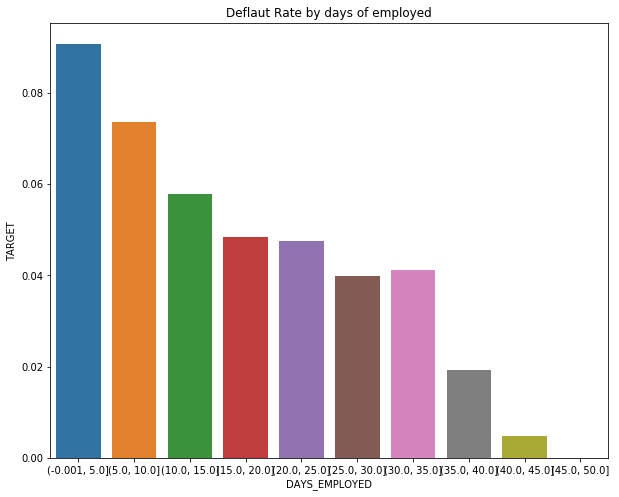

In [54]:
plt.figure(figsize=[10,8])
x = deflaut_rate.index
y = deflaut_rate['TARGET']
sns.barplot(x,y)
plt.title('Deflaut Rate by days of employed')

In [57]:
df['years_employed'] = app_train['DAYS_EMPLOYED']
df.head().head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,TARGET,DAYS_EMPLOYED,years_employed
0,1,"(-0.001, 5.0]",1.745205
1,0,"(-0.001, 5.0]",3.254795
2,0,"(-0.001, 5.0]",0.616438
3,0,"(5.0, 10.0]",8.326027
4,0,"(5.0, 10.0]",8.323288


In [58]:
group_list = list(df['DAYS_EMPLOYED'].unique())

In [60]:
df_1 = df[df['TARGET'] ==1]
df_1.head()

,TARGET,DAYS_EMPLOYED,years_employed
0,1,"(-0.001, 5.0]",1.745205
26,1,"(5.0, 10.0]",7.200000
40,1,"(-0.001, 5.0]",3.457534
42,1,"(5.0, 10.0]",9.854795
81,1,"(-0.001, 5.0]",0.000000


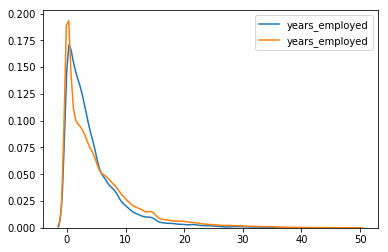

In [65]:
sns.kdeplot(df['years_employed'][df['TARGET'] ==1])
sns.kdeplot(df['years_employed'][df['TARGET'] ==0])

### 確認年齡和employed 日期的關係

In [71]:
df['age'] = app_train['DAYS_BIRTH']/365
a = df.groupby('DAYS_EMPLOYED').mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


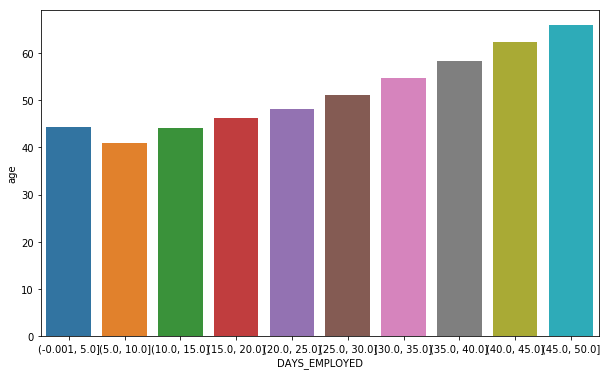

In [81]:
plt.figure(figsize=[10,6])
x = a.index
y = a['age']
sns.barplot(x,y)